# Color
##### Types: RGB, 
#####        HLS(hue, lightness, saturation), 
#####        HSV(hue, saturation, value)

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

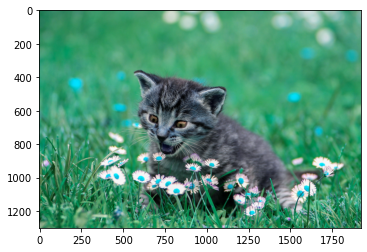

In [7]:
img = cv2.imread("assets/cat.jpg")
plt.imshow(img)

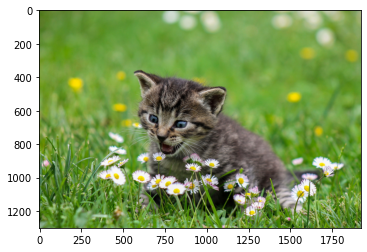

In [10]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

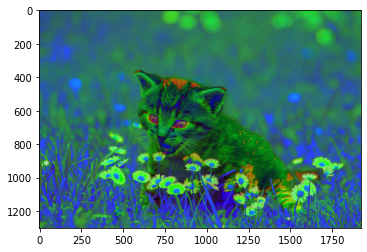

In [12]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img_hls)

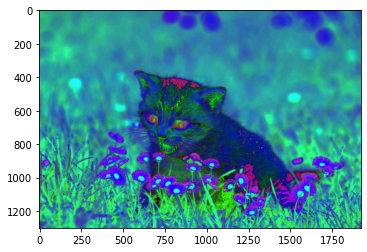

In [13]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

# Blending and pasting images
##### blending = alpha x pixel from img a + beta x pixel from img b + gamma

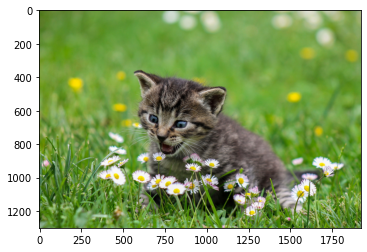

In [16]:
img1 = cv2.imread("assets/cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread("assets/cat1.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

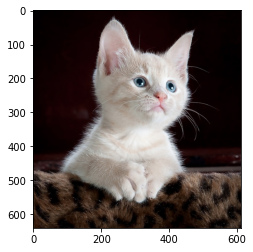

In [17]:
plt.imshow(img2)

In [19]:
img1 = cv2.resize(img1,(1000,1000))
img2 = cv2.resize(img2,(1000,1000))

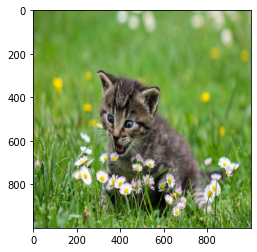

In [20]:
plt.imshow(img1)

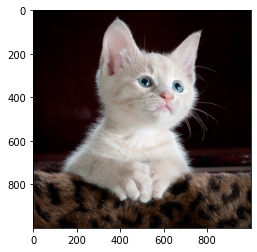

In [21]:
plt.imshow(img2)

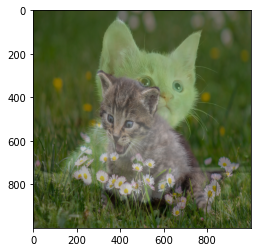

In [29]:
blended = cv2.addWeighted(img1,0.5,img2,0.4,0.3) #overlay 2 images of same sizes
plt.imshow(blended)

In [ ]:
# overlay 2 images of different sizes with no blending

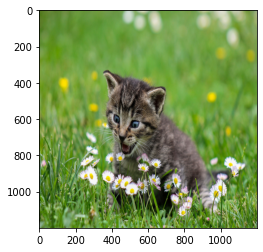

In [20]:
img1 = cv2.imread("assets/cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.imread("assets/cat1.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img1)

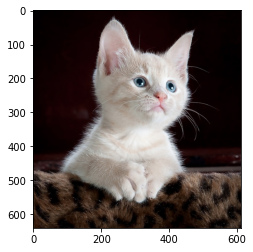

In [3]:
plt.imshow(img2)

In [4]:
large_img = img1
small_img = img2

In [24]:
x_offset = 100
y_offset = 100
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
small_img.shape

(640, 612, 3)

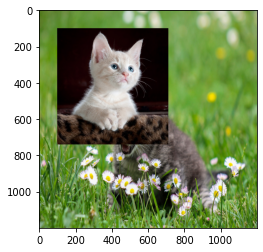

In [25]:
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

In [15]:
# overlay 2 images of different sizes with blending

In [58]:
img1 = cv2.imread("assets/cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img1 = cv2.resize(img1,(1200,1200))
img2 = cv2.imread("assets/cute.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
large_img = img1
small_img = img2

In [59]:
print(large_img.shape)
print(small_img.shape)

(1200, 1200, 3)
(920, 750, 3)


In [61]:
x_offset = 1200-750
y_offset = 1200-920
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
small_img.shape

(920, 750, 3)

In [62]:
roi = large_img[y_offset:1200, x_offset:1200]

In [63]:
img2gray = cv2.cvtColor(img2,cv2.COLOR_RGB2GRAY)

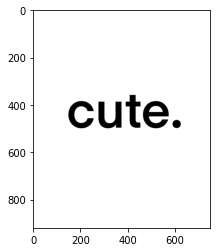

In [64]:
plt.imshow(img2gray,cmap='gray')

In [65]:
mask_inv = cv2.bitwise_not(img2gray)

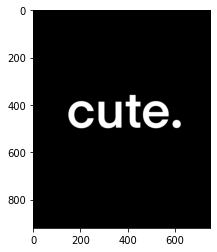

In [66]:
plt.imshow(mask_inv,cmap='gray')

In [67]:
mask_inv.shape

(920, 750)

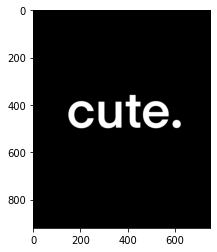

In [77]:
plt.imshow(mask_inv,cmap='gray')

In [69]:
import numpy as np

In [78]:
white_background = np.full(img2.shape, 255,dtype=np.uint8)

In [79]:
white_background.shape

(920, 750, 3)

In [80]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)#

In [81]:
bk.shape

(920, 750, 3)

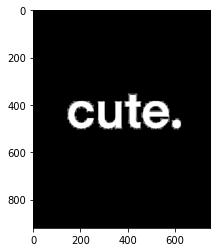

In [82]:
plt.imshow(bk)

In [75]:
fg = cv2.bitwise_or(img2,img2,mask=mask_inv)

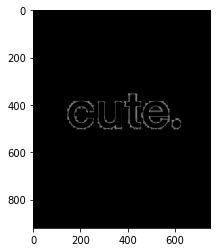

In [76]:
plt.imshow(fg)

In [84]:
final_roi = cv2.bitwise_or(roi,fg)

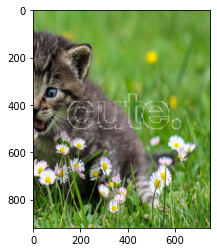

In [85]:
plt.imshow(final_roi)

# Image thresholding
##### Sometimes images are converted to grayscale because only the edges and shapes are needed to determine what the image is.
##### We can threshold the image and segment it to only consist of black or white.

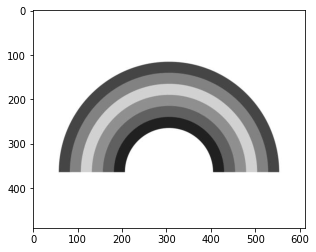

In [7]:
img = cv2.imread("assets/rainbow.jpg",0)
plt.imshow(img,cmap='gray')

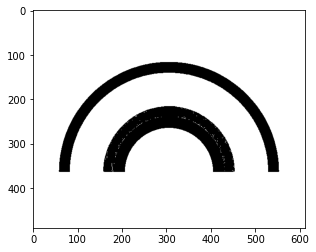

In [11]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #split the dataset into 2 parts, if below thres 127, become 0. If above thres, become max val.
plt.imshow(thresh, cmap='gray')

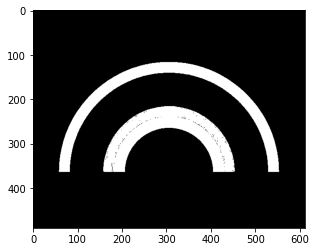

In [12]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV) #Opposite of THRESH_BINARY
plt.imshow(thresh, cmap='gray')

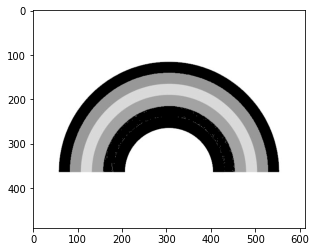

In [14]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_TOZERO) #if smaller than thres 127, become 0. If greater than 127, than original
plt.imshow(thresh, cmap='gray')

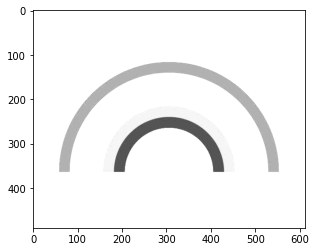

In [15]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_TRUNC) #if more than thres 127, pull the value down to thres. If below thres 127, use original.
plt.imshow(thresh, cmap='gray')

# Application of thresholding
#### Filter out things that are not needed.
#### Technics: Edit thres value, use different types of THRES

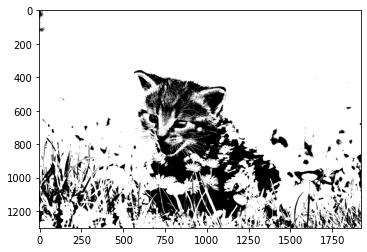

In [32]:
img = cv2.imread("assets/cat.jpg",0)
ret,thresh = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')

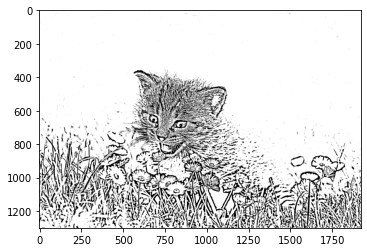

In [33]:
#adaptive thresholding is a method where the threshold value is calculated for smaller regions
img = cv2.imread("assets/cat.jpg",0)
thresh_a = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,17,8) 
plt.imshow(thresh_a,cmap='gray')

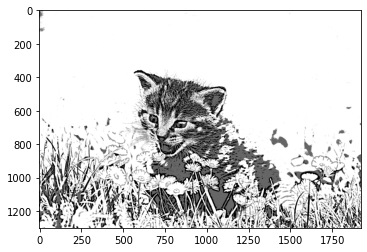

In [35]:
#beldning both img may have different effects
blended = cv2.addWeighted(src1=thresh, alpha=0.6, src2=thresh_a,beta=0.4,gamma=0)
plt.imshow(blended,cmap='gray')